In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
taxi_data_jan24 = pd.read_csv("data/yellow_tripdata.csv",low_memory = False)
taxi_data = pd.concat([taxi_data_jan24])
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [63]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [64]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID','payment_type',  'total_amount']]
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


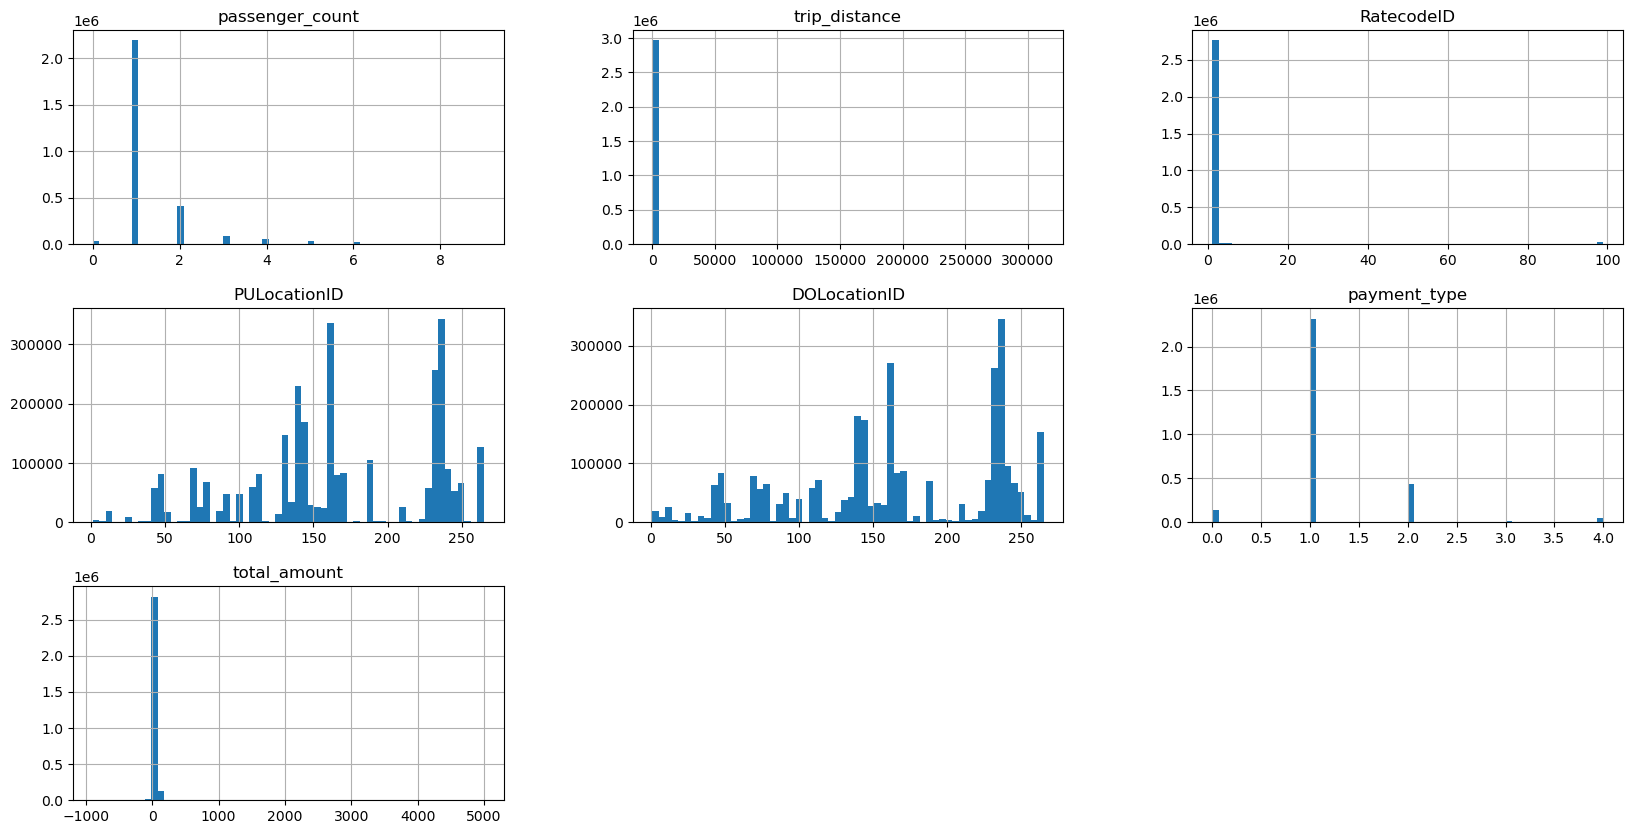

In [74]:
_ = taxi_data.hist(figsize = (20, 10), bins = 60)
plt.show()

In [82]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

In [84]:
taxi_data['payment_type'].value_counts()

payment_type
1    2319046
2     439191
0     140162
4      46628
3      19597
Name: count, dtype: int64

In [98]:
taxi_data['trip_distance'].value_counts()

trip_distance
0.00        60371
0.90        40455
1.00        40192
0.80        39964
1.10        38662
            ...  
33.33           1
40.17           1
47.48           1
47.95           1
21235.88        1
Name: count, Length: 4489, dtype: int64

In [100]:
taxi_data['total_amount'].value_counts()

total_amount
16.80     45432
12.60     43275
21.00     36556
15.12     26687
15.96     26396
          ...  
584.18        1
323.28        1
201.93        1
128.09        1
118.96        1
Name: count, Length: 19241, dtype: int64

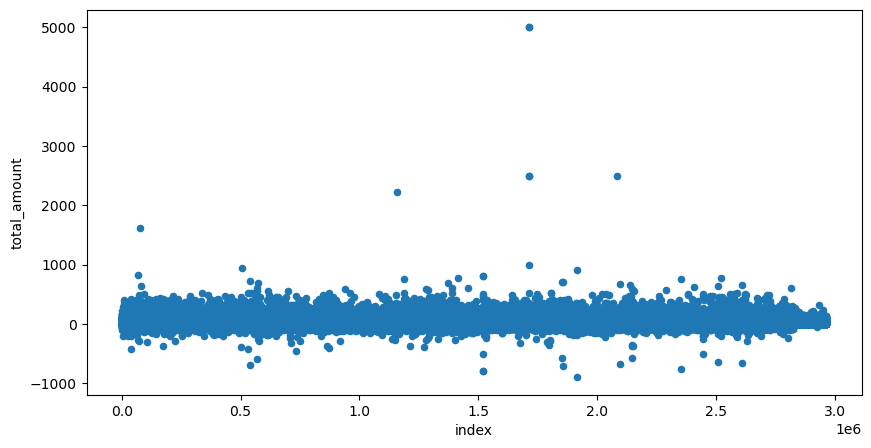

In [142]:
_ = taxi_data.reset_index().plot(kind='scatter', y ='total_amount', x='index', figsize=(10, 5))
plt.show()

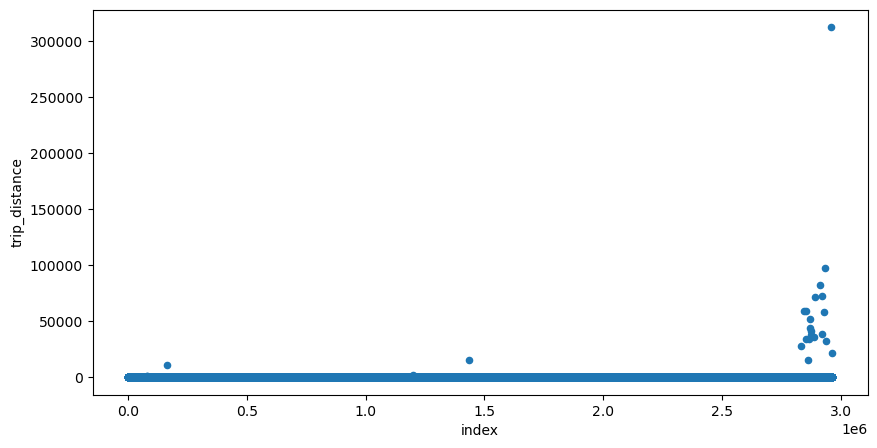

In [144]:
_ = taxi_data.reset_index().plot(kind='scatter', y ='trip_distance', x='index', figsize=(10, 5))
plt.show()

Have to clean data to remove high alues and negative values. Also fix entries with 99 as RatecodeID